# Implementation of Kernel Dictionary learning

### Import area :

In [1]:
import Signal as sg
import Kernel as kn
import KernelDictionaryLearning as kdl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

### Hyperparameters

In [2]:
# HYPERPARAMETERS OF THE PROBLEM
data_sample_number = 1500
n_iter = 15
sparsity_level=3
atom_number=30

Variables 

In [3]:
polynomial_kernel = kn.polynomial_kernel(c=1,d=2) # Beware : c=1 for nice plots
gaussian_kernel = kn.gaussian_kernel(c=10)
signals_r1 = sg.synthetic_circle(radius=1,data_number=data_sample_number)
signals_r2 = sg.synthetic_circle(radius=2,data_number=data_sample_number)

trained_kdl_r1 = kdl.KernelDictionaryLearning(signals=signals_r1,kernel=polynomial_kernel,sparsity_level=sparsity_level,atom_number=atom_number,n_iter=n_iter)
msg1, errors_komp_1, errors_ksvd_1 = trained_kdl_r1.learn()
print (f"Status training sur signaux classe 1 : {msg1}\n")

trained_kdl_r2 = kdl.KernelDictionaryLearning(signals=signals_r2,kernel=polynomial_kernel,sparsity_level=sparsity_level,atom_number=atom_number,n_iter=n_iter)
msg2, errors_komp_2, errors_ksvd_2 = trained_kdl_r2.learn()
print (f"Status training sur signaux classe 2 : {msg2}")

Total representation error is 48.62205745391927 at step 0 after KOMP
Total representation error is 44.64572181876576 at step 0 after KKSVD
Total representation error is 42.62149942337875 at step 1 after KOMP
Total representation error is 41.75122350908372 at step 1 after KKSVD
Total representation error is 40.033627757661336 at step 2 after KOMP
Total representation error is 39.722103613340664 at step 2 after KKSVD
Total representation error is 37.60601348879882 at step 3 after KOMP
Total representation error is 37.30899887121906 at step 3 after KKSVD
Total representation error is 35.85690669359906 at step 4 after KOMP
Total representation error is 35.55190064527956 at step 4 after KKSVD
Total representation error is 34.16500025378892 at step 5 after KOMP
Total representation error is 33.913103099600434 at step 5 after KKSVD
Total representation error is 31.155647062400078 at step 6 after KOMP
Total representation error is 30.67409492722507 at step 6 after KKSVD
Total representation er

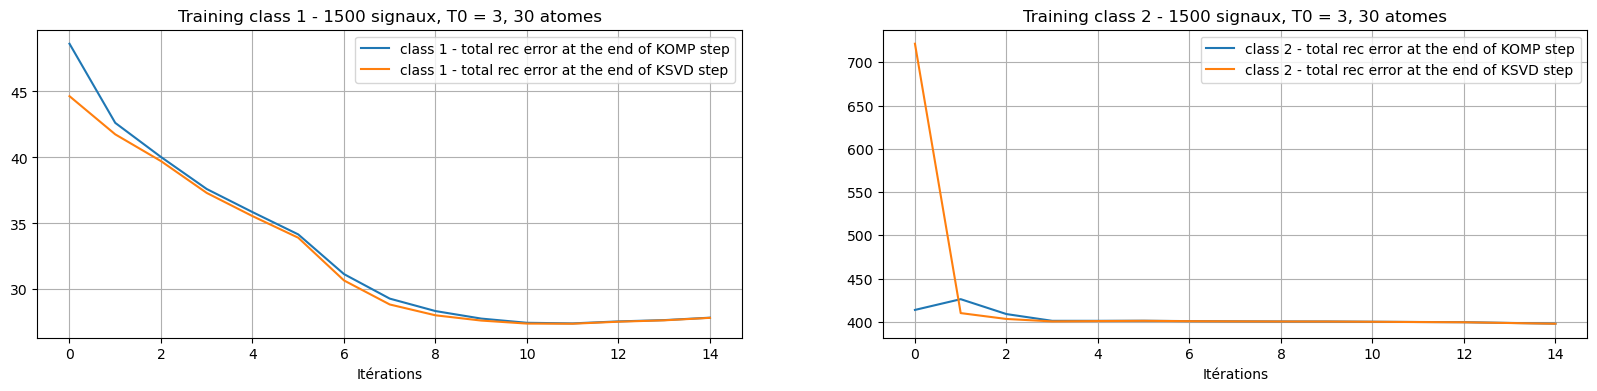

In [4]:
fig, axs = plt.subplots(figsize=(20,4), nrows=1, ncols=2)

axs[0].plot(errors_komp_1, label=f'class 1 - total rec error at the end of KOMP step')
axs[0].plot(errors_ksvd_1, label=f'class 1 - total rec error at the end of KSVD step')
axs[0].set_xlabel(f"Itérations")
axs[0].grid(True)
axs[0].legend()
axs[0].set_title(f"Training class 1 - {data_sample_number} signaux, T0 = {sparsity_level}, {atom_number} atomes")

axs[1].plot(errors_komp_2, label=f'class 2 - total rec error at the end of KOMP step')
axs[1].plot(errors_ksvd_2, label=f'class 2 - total rec error at the end of KSVD step')
axs[1].grid(True)
axs[1].set_title(f"Training class 2 - {data_sample_number} signaux, T0 = {sparsity_level}, {atom_number} atomes")
axs[1].set_xlabel(f"Itérations")
axs[1].legend()

plt.show()

/tmp/ipykernel_733349/2044937268.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap("OrRd").copy()


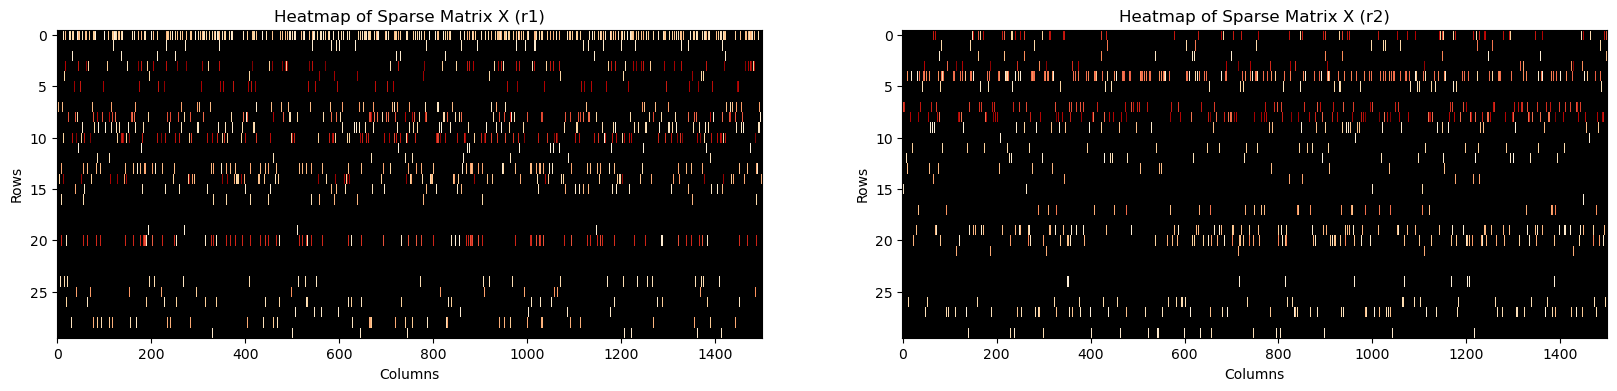

In [5]:
X1 = trained_kdl_r1._KernelDictionaryLearning__matrix_X
X2 = trained_kdl_r2._KernelDictionaryLearning__matrix_X

fig, axs = plt.subplots(figsize=(20,4), nrows=1, ncols=2)

cmap = matplotlib.cm.get_cmap("OrRd").copy()
cmap.set_under(color='black')    

axs[0].imshow(X1, aspect='auto', interpolation='none', cmap=cmap, vmin=0.0000001)
axs[0].set_title(f"Heatmap of Sparse Matrix X (r1)")
axs[0].set_xlabel("Columns")
axs[0].set_ylabel("Rows")

axs[1].imshow(X2, aspect='auto', interpolation='none', cmap=cmap, vmin=0.0000001)
axs[1].set_title(f"Heatmap of Sparse Matrix X (r2)")
axs[1].set_xlabel("Columns")
axs[1].set_ylabel("Rows")

plt.show()

### Image Plot

In [6]:
resolution_plot = 100
coord_lim = 3
x = np.linspace(-coord_lim, coord_lim, resolution_plot)
y = np.linspace(-coord_lim, coord_lim, resolution_plot)
epsilon = 1e-20 # regularization parameter to avoid division by zero
Z = np.array([ np.array([ np.abs(trained_kdl_r1.KOMP(sg.Signal([xi,yi],2))[1])/(np.abs(trained_kdl_r2.KOMP(sg.Signal([xi,yi],2))[1])+epsilon) for xi in x]) for yi in y ])
#Z = np.array([ np.array([ 1 if np.abs(trained_kdl_r1.KOMP(sg.Signal(np.array([xi,yi]),2))[1])>np.abs(trained_kdl_r2.KOMP(sg.Signal(np.array([xi,yi]),2))[1]) else -1 for xi in x]) for yi in y ])
#Z = np.array([ np.array([ np.abs(trained_kdl_r1.KOMP(sg.Signal([xi,yi],2))[1]) for xi in x]) for yi in y ])
log_ratios = np.log10(Z)

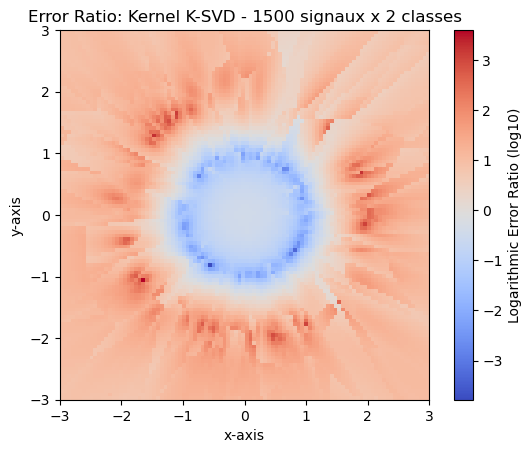

In [7]:
# DISPLAY THE IMAGE
plt.imshow(log_ratios, cmap='coolwarm', origin='lower', extent=[-coord_lim, coord_lim, -coord_lim, coord_lim])
plt.colorbar(label='Logarithmic Error Ratio (log10)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title(f'Error Ratio: Kernel K-SVD - {data_sample_number} signaux x 2 classes')
plt.show()